#  Task 02 Python Excel 自动化之 XLWings

## 2.0 模块基本介绍与使用

**xlwings** <br/>
基本介绍：用于Python与Excel之间的交互，可以轻松地从 Excel 调用 Python，也可以利用Python自动化操作Excel，调用VBA，非常方便。

项目地址：https://github.com/xlwings/xlwings

![xlwings-principle](./imgs/Python_Excel_XLWings/xlwings-principle.png)
基本使用方法：新建一个excel文件，取名为xlwings_wb.xlsx，并新建一个sheet，取名为first_sht，在其A1单元格内插入字符串`Datawhale`。

打开 CMD/Terminal 进入到自己环境后，执行下面语句安装 xlwings 模块。
```python
pip3 install xlwings
```

In [1]:
root_path = './XLWings_test/'

In [2]:
# 导入xlwings，并起一个别名 xw，方便操作
import xlwings as xw

# 1、创建一个app应用，打开Excel程序
# visible=True 表示打开操作Excel过程可见 初次接触可以设置为True，了解其过程
# add_book=False 表示启动app后不用新建个工作簿
app = xw.App(visible=True, add_book=False)

# 2、新建一个工作簿
wb = app.books.add()

# 3、新建一个sheet，并操作
# 3.1 新建sheet 起名为first_sht
sht = wb.sheets.add('first_sht')
# 3.2 在新建的sheet表中A1位置插入一个值：Datawhale
sht.range('A1').value = 'Datawhale'
# 3.3 保存新建的工作簿，并起一个名字
wb.save(root_path+'xlwings_wb.xlsx')

# 4、关闭工作簿
wb.close()

# 5、程序运行结束，退出Excel程序
app.quit()

通过简单五步，我们就可以完成新建一个excel，并向其中指定sheet中的指定位置输入值了。
![code-result](./imgs/Python_Excel_XLWings/code-result.png)

## 2.1 xlwings模块实战

### 2.1.1 基础语法一览

- 导包

In [3]:
# 基础导入包
import xlwings as xw  # 程序第一步

- 打开关闭Excel程序（理解成excel软件打开、关闭）

In [4]:
# visible=True 表示打开操作Excel过程可见 初次接触可以设置为True，了解其过程
# add_book=False 表示启动app后不用新建个工作簿
app = xw.App(visible=True, add_book=False)  # 程序第二步

# 关闭excel程序
# app.quit()  # 程序最后一步

- 工作簿相关操作（理解成excel文件）

In [5]:
# 1、新建一个工作簿
# wb = app.books.add()  # 程序第三步

# 2、保存新建的工作簿，并起一个名字
# 程序倒数第三步，非常关键，保存操作数据结果
# wb.save(root_path+'xlwings_wb.xlsx')  


# 3、打开一个已经存在的工作簿
wb = app.books.open(root_path+'xlwings_wb.xlsx')  # 程序第三步

# 4、关闭工作簿
# wb.close()  # 程序倒数第二步

- sheet相关操作（理解成工作表）

In [6]:
# 在工作簿中新建一个sheet，起名为 second_sht
sht1 = wb.sheets.add('second_sht')
print('sht1:', sht1)

# 选中已经存在的sheet
sht2 = wb.sheets('first_sht')
print('sht2:', sht2)

# 也可以通过索引选择已存在的sheet
sht3 = wb.sheets[0]  # 选中工作簿中的第一个sheet
print('sht3:', sht3)

# 获取工作簿中工作表的个数
sht_nums = wb.sheets.count
print('工作簿中的sheet个数为：%d'% sht_nums)

# 当前工作表名字
print('sht1.name:', sht1.name)

# 获取指定sheet中数据的行数
print('sht1.used_range.last_cell.row:', sht1.used_range.last_cell.row)

# 获取指定sheet中数据的列数
print('sht1.used_range.last_cell.column:', sht1.used_range.last_cell.column)

# 删除指定的sheet 比如删除：first_sht
wb.sheets('first_sht').delete()

sht1: <Sheet [xlwings_wb.xlsx]second_sht>
sht2: <Sheet [xlwings_wb.xlsx]first_sht>
sht3: <Sheet [xlwings_wb.xlsx]second_sht>
工作簿中的sheet个数为：3
sht1.name: second_sht
sht1.used_range.last_cell.row: 1
sht1.used_range.last_cell.column: 1


- 单元格相关操作（就是excel单元格子）

In [7]:
'''
写入
'''
# 在工作表中指定位置插入数据
sht1.range('B1').value = 'Datawhale'

# 在工作表指定位置插入多个数据 默认是横向插入
sht1.range('B2').value = ['DATAWHALE', 'FOR', 'THE', 'LEARNER']

# 在工作表指定位置竖向插入多个数据
# 设置 options(transpose=True)，transpose=True 表示转置的意思
sht1.range('B3').options(transpose=True).value = [1, 2, 3, 4]

# 在工作表指定位置开始插入多行数据
sht1.range('B7').value = [['a', 'b'], ['c', 'd']]

# 在工作表指定位置开始插入多列数据
sht1.range('B9').options(transpose=True).value = [['a', 'b'], ['c', 'd']]

# 向单元格写入公式
sht1.range('F2').formula = '=sum(B2:E2)'

运行结果：
![xlwings-write](./imgs/Python_Excel_XLWings/xlwings-write.png)

In [8]:
'''
读取
'''
# 在工作表中读取指定位置数据
print('单元格B1=', sht1.range('B1').value)

# 在工作表中读取指定区域数据 一行
print('单元格B2:F2=', sht1.range('B2:F2').value)

# 在工作表中读取指定区域数据 一列
print('单元格B3:B6=', sht1.range('B3:B6').value)

# 在工作表中读取指定区域数据 一个区域
# 设置options(transpose=True)就可以按列读 不设置就是按行读
print('单元格B7:C10=', sht1.range('B7:C10').options(transpose=True).value)

单元格B1= Datawhale
单元格B2:F2= ['DATAWHALE', 'FOR', 'THE', 'LEARNER', 0.0]
单元格B3:B6= [1.0, 2.0, 3.0, 4.0]
单元格B7:C10= [['a', 'c', 'a', 'b'], ['b', 'd', 'c', 'd']]


In [9]:
'''
删除
'''
# 删除指定单元格中的数据
sht1.range('B10').clear()

# 删除指定范围内单元格数据
sht1.range('B7:B9').clear()

### 2.1.2 单元格样式设置

In [10]:
'''
格式修改
'''
# 选中已经存在的sheet
sht1 = wb.sheets('second_sht')
# 返回单元格绝对路径
sht1.range('B3').get_address()
# sht1.range('B3').address

# 合并单元格B3 C3
sht1.range('B3:C3').api.merge()

# 解除合并单元格B3 C3
# sht1.range('B3:C3').api.unmerge()

# 向指定单元格添加带超链接文本
# address- 超连接地址
# text_to_display- 超链接文本内容
# screen_tip- 鼠标放到超链接上后显示提示内容
sht1.range('C2').add_hyperlink(address='https://datawhale.club',
                   text_to_display='DATAWHALE 官网',
                   screen_tip='点击查看 DATAWHALE 官网 ')

# 获取指定单元格的超链接地址
sht1.range('C2').hyperlink

# 自动调试指定单元格高度和宽度
sht1.range('B1').autofit()

# 设置指定单元格背景颜色
sht1.range('B1').color = (93,199,221)

# 返回指定范围内的中第一列的编号 数字，如：A-1 B-2
sht1.range('A2:B2').column

# 获取或者设置行高/列宽
# row_height/column_width会返回行高/列宽 ，范围内行高/列宽不一致会返回None
# 也可以设置一个新的行高/列宽
sht1.range('A2').row_height = 25
sht1.range('B2').column_width = 20

运行结果：
![xlwings-format](./imgs/Python_Excel_XLWings/xlwings-format.png)

- 在windows上可以使用以下方法设置单元格文字颜色等格式，如下：

```python
# windows系统下字体设置在 sheet.range().api.Font下
# 颜色
sht1.range('A1').api.Font.Color = (255,0,124)
# 字体名字
sht1.range('A1').api.Font.Name = '宋体'
# 字体大小
sht1.range('A1').api.Font.Size = 28
# 是否加粗
sht1.range('A1').api.Font.Bold = True
# 数字格式
sht1.range('A1').api.NumberFormat = '0.0'
# -4108 水平居中
# -4131 靠左
# -4152 靠右
sht1.range('A1').api.HorizontalAlignment = -4108
# -4108 垂直居中（默认)
# -4160 靠上
# -4107 靠下
# -4130 自动换行对齐。
sht1.range('A1').api.VerticalAlignment = -4130
# 设置上边框线风格和粗细
sht1.range('A1').api.Borders(8).LineStyle = 5
sht1.range('A1').api.Borders(8).Weight = 3
```

- 在mac下可以通过以下方法设置字体格式

```python
# 在mac下可以通过以下方法设置字体格式
# 设置单元格的字体颜色
rgb_tuple = (0, 10, 200)
sht1.range('B1').api.font_object.color.set(rgb_tuple)

# 获取指定单元格字体颜色
sht1.range('B1').api.font_object.color.get()

# 获取指定单元格字体名字 可以使用set方法修改字体 set('宋体')
sht1.range('B1').api.font_object.name.get()

# 设置指定单元格字体格式 可以用get方法查看单元格字体格式
sht1.range('B3').api.font_object.font_style.set('加粗')

# 设置指定单元格字体大小
sht1.range('B3').api.font_object.font_size.set(20)

# 设置边框线粗细
sht1.range('B2').api.get_border(which_border=9).weight.set(4)

# 设置边框线风格
sht1.range('B2').api.get_border(which_border=9).line_style.set(8)
```

样式值含义基本说明：

![xlwings-border](./imgs/Python_Excel_XLWings/xlwings-border.png)

![xlwings-line](./imgs/Python_Excel_XLWings/xlwings-line.png)

再次提醒，进行完所有操作后一定要记得执行以下三句：

In [11]:
# 保存新建的工作簿，并起一个名字（如果已存在有名字的excel文件，就直接save即可）
wb.save()
# 关闭工作簿（关闭Excel文件）
wb.close()
# 程序运行结束，退出Excel程序
app.quit()

### 2.1.3 Excel中生成统计图或者插入图片

- 自动生成统计图

In [12]:
import xlwings as xw

# 新建一个sheet
app = xw.App(visible=True, add_book=False)
wb = app.books.open(root_path+'xlwings_wb.xlsx')
sht3 = wb.sheets.add('third_sht')

import pandas as pd
import numpy as np

# 生成模拟数据
df = pd.DataFrame({
    'money':np.random.randint(45, 50, size = [1, 20])[0],
},
    index=pd.date_range('2021-02-01', '2021-02-20'),  # 行索引和时间相关
)
df.index.name = '消费日期'  # 设置索引名字

sht3.range('A1').value = df

# 生成图表
chart1 = sht3.charts.add()  # 创建一个图表对象
chart1.set_source_data(sht3.range('A1').expand())  # 加载数据
chart1.chart_type = 'line'  # 设置图标类型
chart1.top = sht3.range('D2').top  
chart1.left = sht3.range('D2').left  # 设置图标开始位置 

运行结果：
![xlwings-charts](./imgs/Python_Excel_XLWings/xlwings-charts.png)

除了绘制折线图，我们还可以绘制其他类型的图，修改`chart_type`值即可。
```python
# 查看其他chart_types值
xw.constants.chart_types
```

返回结果很长，这里选几个常见的图形列出来：
```
 '3d_line',  # 3D折线图
 '3d_pie', # 3D饼图
 'area',  # 面积图
 'bar_clustered',  # 柱状图相关
 'bubble',  # 气泡图
 'column_clustered',  # 条形图相关
 'line',  # 折线图
 'stock_hlc',  # 有意思 股票K线图
```

- 将本地图片或者matplotlib图片保存到excel

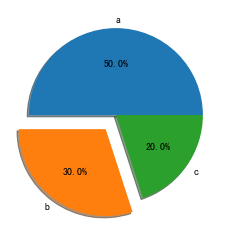

<Picture 'matplotlib' in <Sheet [xlwings_wb.xlsx]third_sht>>

In [13]:
'''
matplotlib 生成的图片存入excel
'''
import matplotlib.pyplot as plt
# 随便绘制一个饼图
fig1 = plt.figure()  # 先创建一个图像对象
plt.pie([0.5, 0.3, 0.2],  # 值
        labels=['a', 'b', 'c'],  # 标签
        explode=(0, 0.2, 0),  # （爆裂）距离
        autopct='%1.1f%%',   # 显示百分数格式
        shadow=True)  # 是否显示阴影
plt.show() 

# 将饼图添加到excel指定位置 J17为图片开始位置
sht3.pictures.add(fig1, name='matplotlib', 
                  left=sht3.range('J17').left, 
                  top=sht3.range('J17').top, update=True)

运行结果：
![xlwings-matplotlib](./imgs/Python_Excel_XLWings/xlwings-matplotlib.png)

In [14]:
'''
本地图片存入excel
'''
# 将本地图片添加到excel指定位置 J1为图片开始位置
pic_path = './imgs/logo.png'
sht3.pictures.add(pic_path, name='local', 
                  left=sht3.range('J1').left, 
                  top=sht3.range('J1').top, update=True)

<Picture 'local' in <Sheet [xlwings_wb.xlsx]third_sht>>

运行结果：
![xlwings-local](./imgs/Python_Excel_XLWings/xlwings-local.png)

## 2.2 实战练习

### 2.2.1 将消费数据可视化生成带平均线的趋势图，存入excel

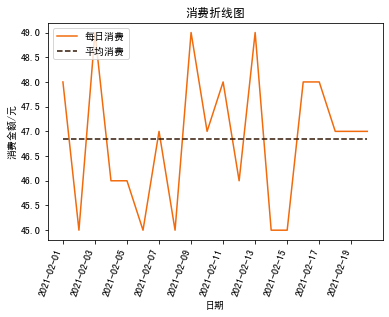

<Picture '消费情况' in <Sheet [xlwings_wb.xlsx]third_sht>>

In [15]:
'''
实战练习一：将消费数据可视化生成带平均线的趋势图，存入excel
数据就是之前生成的模拟数据
'''
fig, ax = plt.subplots()  # 创建一个画板
# 生成一条新线- 平均消费数据
money_m = [df['money'].mean(axis=0) for i in range(len(df['money']))]
# 建一条线：消费趋势折线图
ax.plot(df.index, df['money'], color='#f16a0b', label='每日消费')
# 再建一条线：平均消费直线图
ax.plot(df.index, money_m, linestyle='--', color='#301502', label='平均消费')
# 设置横纵坐标基础说明
ax.set_xlabel(u'日期') 
ax.set_ylabel(u'消费金额/元') 
ax.set_title(u'消费折线图')  
# 设置x轴值显示方向
plt.setp(ax.get_xticklabels(), rotation=70, horizontalalignment='right')
# 添加图例（label说明到图片上） loc设置显示位置
ax.legend(loc=2) 
plt.show()
sht3.pictures.add(fig, name='消费情况', 
                  left=sht3.range('D17').left, 
                  top=sht3.range('D17').top, update=True)

运行结果：
![xlwings-practice1](./imgs/Python_Excel_XLWings/xlwings-practice1.png)

[matplotlib 中文显示参考教程](https://juejin.cn/post/7011473852198977550)

In [16]:
# 保存新建的工作簿，并起一个名字（如果已存在有名字的excel文件，就直接save即可）
wb.save()
# 关闭工作簿（关闭Excel文件）
wb.close()
# 程序运行结束，退出Excel程序
app.quit()

### 2.2.2 将股票数据以指定的格式存储到excel并生成股票走势图

- 新建一个sheet，然后获取数据

In [17]:
'''
实战练习二：将股票数据以指定的格式存储到excel并生成股票走势图
利用akshare爬取上证指数数据 代号：sh000001
'''
# 需要提前 pip install akshare 安装 akshare
import akshare as ak
import xlwings as xw
import datetime 

# 新建一个sheet
app = xw.App(visible=True, add_book=False)
wb = app.books.open(root_path+'xlwings_wb.xlsx')
sz_sht = wb.sheets.add('sz_sht')  # 第一次新建
# sz_sht = wb.sheets['sz_sht']  # 已经存在，直接打开

# 获取数据 open high low close volume index-date
# volume 是成交量 多少股
# 0、获取数据
sz_index = ak.stock_zh_index_daily(symbol="sh000001")
sz_index

,date,open,high,low,close,volume
0,1990-12-19,96.050,99.980,95.790,99.980,126000
1,1990-12-20,104.300,104.390,99.980,104.390,19700
2,1990-12-21,109.070,109.130,103.730,109.130,2800
3,1990-12-24,113.570,114.550,109.130,114.550,3200
4,1990-12-25,120.090,120.250,114.550,120.250,1500
...,...,...,...,...,...,...
7686,2022-06-08,3245.017,3266.630,3216.015,3263.793,43418327000
7687,2022-06-09,3259.490,3270.557,3223.475,3238.954,42272837200
7688,2022-06-10,3214.185,3286.620,3210.808,3284.834,43986573000
7689,2022-06-13,3256.275,3272.991,3229.309,3255.551,43857831200


- 处理并存储数据到excel

In [18]:
# 1、处理下数据
sz_index.set_index('date', inplace=True)
sz_data = sz_index[datetime.date(2022,1,1):datetime.date(2022,6,14)].iloc[:,0:4]  # 只取今年数据 ohlc
sz_data.index = sz_data.index.to_series().apply(lambda x : x.strftime('%m-%d')) # 将索引日期格式改为 月-日

# 2、存储数据
sz_sht.range('A1').value = sz_data

- 处理表格中数据格式

In [19]:
# 3、处理数据格式
# - 表头字体 格式加粗 背景颜色
sz_sht.range('A1:E1').api.font_object.name.set('Calibri')
sz_sht.range('A1:E1').api.font_object.font_style.set('加粗')
sz_sht.range('A1:E1').api.font_object.color.set((255, 255, 255))
# 背景颜色
sz_sht.range('A1:E1').color = (16, 156, 245) 
# mac上居中未实现，有了解的小伙伴可以留言指出下，感谢
# sz_sht.range('B1').api.font_object.horizontalalignment = xw.constants.Constants.xlCenter

# - 添加边框
# 1 左+内部竖线  
sz_sht.range('A1:E177').api.get_border(which_border=1).weight.set(2)
# 10 最右侧竖线
sz_sht.range('A1:E177').api.get_border(which_border=10).weight.set(2)
# 3 上+内部横线
sz_sht.range('A1:E177').api.get_border(which_border=3).weight.set(2)
# 9 最下面横线
sz_sht.range('A1:E177').api.get_border(which_border=9).weight.set(2)

- 生成ohlc k线图并存储到excel指定位置

In [20]:
# 4、生成图表
chart_ohlc = sz_sht.charts.add()  # 创建一个图表对象
chart_ohlc.set_source_data(sz_sht.range('A1').expand())  # 加载数据
chart_ohlc.chart_type = 'stock_ohlc'  # 设置图标类型
chart_ohlc.top = sz_sht.range('G2').top  
chart_ohlc.left = sz_sht.range('G2').left  # 设置图标开始位置 

运行结果：
![xlwings-practice2](./imgs/Python_Excel_XLWings/xlwings-practice2.png)

In [21]:
# 保存新建的工作簿，并起一个名字（如果已存在有名字的excel文件，就直接save即可）
wb.save()
# 关闭工作簿（关闭Excel文件）
wb.close()
# 程序运行结束，退出Excel程序
app.quit()